In [4]:
#importing packages
import pandas as pd
import numpy as np
import os as os
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

In [6]:
#Reading dataset and getting variables to be considered for clustering
dat = pd.read_csv('D:/europe11.csv')
dat1 = dat.drop('Country', axis=1)
dat1.head()
#dat1.describe

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,83871,41600,3.5,79.91,0.80,0.03,4.2
1,30528,37800,3.5,79.65,1.30,0.06,7.2
2,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,78867,27100,1.9,77.38,1.15,-0.13,8.5


In [7]:
#scaling the variables
X_scaled = preprocessing.scale(dat1)

In [8]:
K = range(1,15)
KM = [KMeans(n_clusters=k).fit(X_scaled) for k in K]
centroids = [k.cluster_centers_ for k in KM]
#print("KMeans \n",KM)
#print("KMeans \n",KM,"Centroid \n",centroids)

In [9]:
#Calculate the distance of the points from the centre of the cluster to calculate the 
#within sum of squares
D_k = [cdist(X_scaled, cent, 'euclidean') for cent in centroids]
#for each K(between 1 to 14) finding with which cluster, the distance for each observation is minimum
cIdx = [np.argmin(D,axis=1) for D in D_k]

In [10]:
#for each K(between 1 to 14) finding the minimum distance of each observation with centroid
dist = [np.min(D,axis=1) for D in D_k]

In [11]:
avgWithinSS = [sum(d)/X_scaled.shape[0] for d in dist]

In [12]:
# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X_scaled)**2)/X_scaled.shape[0]
bss = tss-wcss
print(wcss)
#kIdx = 10-1

[196.0, 132.62749228525956, 106.50236499129628, 85.973992724742516, 72.174611072542206, 63.555401102544444, 51.877754858047936, 44.195997405857035, 38.293048637723864, 31.739491568107869, 27.949699264176356, 23.755641054610539, 20.09250677052561, 16.991947585761764]


Text(0.5,1,'Elbow for KMeans clustering')

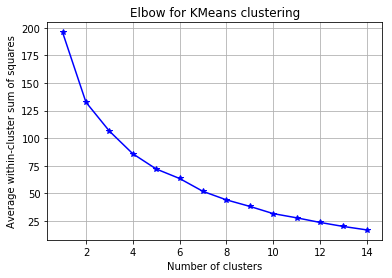

In [13]:
# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, wcss, 'b*-')
#ax.plot(K[kIdx], wcss[kIdx])
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

In [14]:
#Finalize the cluster
kmeans = KMeans(n_clusters=4, random_state=10).fit(X_scaled)
clusters=pd.DataFrame(kmeans.labels_, columns=['Cluster'])
dat = pd.concat([dat, clusters], axis=1)
dat.head()

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment,Cluster
0,Austria,83871,41600,3.5,79.91,0.80,0.03,4.2,1
1,Belgium,30528,37800,3.5,79.65,1.30,0.06,7.2,1
2,Bulgaria,110879,13800,4.2,73.84,2.60,-0.80,9.6,2
3,Croatia,56594,18000,2.3,75.99,2.39,-0.09,17.7,2
4,Czech Republic,78867,27100,1.9,77.38,1.15,-0.13,8.5,2


E:\anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


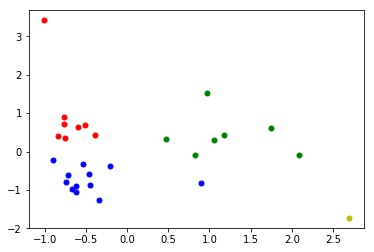

In [15]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=dat1.columns)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ["g.","r.","b.","y."]

#Plots the clusters in a 2D
X= pd.DataFrame(X_scaled).ix[:,0:1]
for i in range(len(dat1)):
    plt.plot(X.ix[i,0], X.ix[i,1], colors[labels[i]], markersize = 10)
#plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

In [16]:
#Hierarchial Clustering
data_dist = pdist(X_scaled) # computing the distance


In [17]:
data_link = linkage(data_dist, method='complete') # computing the linkage


Text(0.5,0.98,'Clustering')

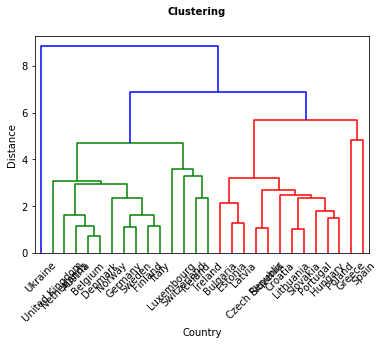

In [18]:
dendrogram(data_link, labels=list(dat.Country))
plt.xlabel('Country')
plt.ylabel('Distance')
plt.suptitle('Clustering', fontweight='bold', fontsize=10)